# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [17]:
# Import warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [18]:
# Import the libraries you will be using for analysis
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", plt.matplotlib.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2
matplotlib version: 3.10.0


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [22]:
# Try loading one file
df = pd.read_parquet(r'D:\Upgrad\Project 1 - Taxi Project\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()
# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [28]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [29]:
# from google.colab import drive
# drive.mount('/content/drive')

In [30]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import glob
file_pattern = "D:\\Upgrad\\Project 1 - Taxi Project\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\*.parquet"        

# Select the folder having data files
parquet_files = glob.glob(file_pattern)

# Create a list of all the twelve files to read
sampled_df_list = []

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in parquet_files:
    try:
        # Load the data from the current Parquet file
        df = pd.read_parquet(file_name)
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        #filter 2023
        df = df[df['tpep_pickup_datetime'].dt.year == 2023]
        df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
        df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
        # 2% on Data by Date and Hour
        sampled_df = df.groupby(['pickup_date', 'pickup_hour']).apply(lambda x: x.sample(frac=0.01))
        sampled_df = sampled_df.reset_index(drop=True)
        sampled_df_list.append(sampled_df)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        
final_sampled_df = pd.concat(sampled_df_list, ignore_index=True)
final_sampled_df.shape    

(379268, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [32]:
# Store the df in csv/parquet
# df.to_parquet('')
final_sampled_df.to_csv('D:\\Upgrad\\Project 1 - Taxi Project\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\sampled_taxi_data.csv', index=False) 
print("Sampled data stored in csv.")

Sampled data stored in csv.


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [35]:
# Load the new data file
final_sampled_file_path = "D:\\Upgrad\\Project 1 - Taxi Project\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\sampled_taxi_data.csv"
df = pd.read_csv(final_sampled_file_path)

In [36]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:17   2023-01-01 01:22:53              4.0   
1         2  2023-01-01 00:13:45   2023-01-01 00:28:02              1.0   
2         2  2023-01-01 00:28:53   2023-01-01 00:39:49              1.0   
3         1  2023-01-01 00:55:59   2023-01-01 01:05:15              2.0   
4         2  2023-01-01 00:12:05   2023-01-01 00:46:32              3.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.02         1.0                  N           231            24   
1           2.34         1.0                  N           161            79   
2           1.82         1.0                  N           186           211   
3           2.20         1.0                  N            79           229   
4           3.31         1.0                  N           246           239   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5       10.84           0.0   
1             1  ...      0.5        4.12           0.0   
2             1  ...      0.5        3.42           0.0   
3             2  ...      0.5        0.00           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         65.04                   2.5          0.0   
1                    1.0         24.72                   2.5          0.0   
2                    1.0         20.52                   2.5          0.0   
3                    1.0         16.40                   2.5          0.0   
4                    1.0         39.70                   2.5          0.0   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               379268 non-null  int64  
 1   tpep_pickup_datetime   379268 non-null  object 
 2   tpep_dropoff_datetime  379268 non-null  object 
 3   passenger_count        366273 non-null  float64
 4   trip_distance          379268 non-null  float64
 5   RatecodeID             366273 non-null  float64
 6   store_and_fwd_flag     366273 non-null  object 
 7   PULocationID           379268 non-null  int64  
 8   DOLocationID           379268 non-null  int64  
 9   payment_type           379268 non-null  int64  
 10  fare_amount            379268 non-null  float64
 11  extra                  379268 non-null  float64
 12  mta_tax                379268 non-null  float64
 13  tip_amount             379268 non-null  float64
 14  tolls_amount           379268 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [40]:
# Fix the index and drop any columns that are not needed
#Changed date column datatype from Object to Date 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

#Changed RatecodeID and passenger_count ti int as they cannot be float 
df['RatecodeID'] = df['RatecodeID'].astype('Int64')
df['passenger_count'] = df['passenger_count'].astype('Int64')

#Dropping drops that would not make any impact on the analysis
df = df.drop(columns=['store_and_fwd_flag'])
df = df.drop(columns=['mta_tax'])
df.reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[ns]
 3   passenger_count        366273 non-null  Int64         
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366273 non-null  Int64         
 6   PULocationID           379268 non-null  int64         
 7   DOLocationID           379268 non-null  int64         
 8   payment_type           379268 non-null  int64         
 9   fare_amount            379268 non-null  float64       
 10  extra                  379268 non-null  float64       
 11  tip_amount             379268 non-null  float64       
 12  tolls_amount           379268 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [42]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
#drop redundant Airport_fee column
df = df.drop(columns=['Airport_fee'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[ns]
 3   passenger_count        366273 non-null  Int64         
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366273 non-null  Int64         
 6   PULocationID           379268 non-null  int64         
 7   DOLocationID           379268 non-null  int64         
 8   payment_type           379268 non-null  int64         
 9   fare_amount            379268 non-null  float64       
 10  extra                  379268 non-null  float64       
 11  tip_amount             379268 non-null  float64       
 12  tolls_amount           379268 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [44]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]
(df['fare_amount'] < 0).sum()

0

Did you notice something different in the `RatecodeID` column for above records?

In [46]:
# Analyse RatecodeID for the negative fare amounts
negative_amount_df = df[df['total_amount'] < 0]
# RatecodeID distribution for negative total_amount
ratecode_analysis = negative_amount_df['RatecodeID'].value_counts().reset_index()
ratecode_analysis.columns = ['RatecodeID', 'Count']
print(ratecode_analysis)

   RatecodeID  Count
0           1     14
1           2      2


In [47]:
# Find which columns have negative values
#int and float cols
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# negative values
negative_cols = df[numeric_cols].apply(lambda x: (x < 0).any())
# col with negative val
negative_cols = negative_cols[negative_cols == True].index.tolist()
print(f"Monetory columns that are having neegative values : {negative_cols}")
#Ans: extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', airport_fee these columns are fare amount which has negative

Monetory columns that are having neegative values : ['extra', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [48]:
# fix these negative values
# None of these values can be negative. Making all negative values zero instead of dropping these rows. 
for col in negative_cols:
    df[col] = df[col].apply(lambda x: max(x, 0))


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [51]:
# Find the proportion of missing values in each column
missing_proportion = 100*df.isnull().mean()
print(missing_proportion)
df.head()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.426337
trip_distance            0.000000
RatecodeID               3.426337
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.426337
airport_fee              3.426337
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:17   2023-01-01 01:22:53                4   
1         2  2023-01-01 00:13:45   2023-01-01 00:28:02                1   
2         2  2023-01-01 00:28:53   2023-01-01 00:39:49                1   
3         1  2023-01-01 00:55:59   2023-01-01 01:05:15                2   
4         2  2023-01-01 00:12:05   2023-01-01 00:46:32                3   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.02           1           231            24             1   
1           2.34           1           161            79             1   
2           1.82           1           186           211             1   
3           2.20           1            79           229             2   
4           3.31           1           246           239             1   

   fare_amount  extra  tip_amount  tolls_amount  improvement_surcharge  \
0         49.2    1.0       10.84           0.0                    1.0   
1         15.6    1.0        4.12           0.0                    1.0   
2         12.1    1.0        3.42           0.0                    1.0   
3         11.4    3.5        0.00           0.0                    1.0   
4         31.7    1.0        3.00           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee pickup_date  pickup_hour  
0         65.04                   2.5          0.0  2023-01-01            0  
1         24.72                   2.5          0.0  2023-01-01            0  
2         20.52                   2.5          0.0  2023-01-01            0  
3         16.40                   2.5          0.0  2023-01-01            0  
4         39.70                   2.5          0.0  2023-01-01            0

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [53]:
# Display the rows with null values
num_of_rows_missing_values = df['passenger_count'].isna().sum()
print(f"Number of rows with null values: {num_of_rows_missing_values}")


Number of rows with null values: 12995


In [54]:
# Impute NaN values in 'passenger_count'
# Replacing missing passenger_count value with 1 as its the most occuring and realistic value
df['passenger_count'] = df['passenger_count'].fillna(1)
#Confirming no rows with null values present after replace
num_of_rows_missing_values = df['passenger_count'].isna().sum()
print(f"Number of rows with null values after replace: {num_of_rows_missing_values}")

Number of rows with null values after replace: 0


Did you find zeroes in passenger_count? Handle these.

In [56]:
#Find rows with passeger_count = 0 
(df['passenger_count'] == 0).sum()



5663

In [57]:
# Replacing the missing passenger_count with mode, which is statistically most recommended
# Also, we already replaced passenger_count null values with 1 in above and do not want to overload data with the same
mode_value = df[df['passenger_count'] > 0]['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].replace(0, mode_value)

#Check rows with passeger_count after replace
(df['passenger_count'] == 0).sum()

0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [59]:
# Fix missing values in 'RatecodeID'
# Replacing the missing RatecodeID with mode, which is statistically most recommended
df['RatecodeID'].value_counts()
RcdID_mode=df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(RcdID_mode)
print(100*df.isnull().mean())

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.426337
airport_fee              3.426337
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [61]:
# handle null values in congestion_surcharge
# Replacing the missing congestion_surcharge with mode, which is statistically most recommended
congestion_surcharge_mode=df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(congestion_surcharge_mode)
print(100*df.isnull().mean())



VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              3.426337
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

Airport_fee in having null values and handling it by replacing with 0 

In [63]:
# Handle any remaining missing values
# Airport_fee in having null values and handling it by replacing with 0 
df['airport_fee'] = df['airport_fee'].fillna(0)
print(100*df.isnull().mean())


VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
pickup_date              0.0
pickup_hour              0.0
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [66]:
# Describe the data and check if there are any potential outliers present

df.describe()


VendorID           tpep_pickup_datetime  \
count  379268.000000                         379268   
mean        1.735501  2023-07-02 20:10:06.053840640   
min         1.000000            2023-01-01 00:01:39   
25%         1.000000  2023-04-02 16:33:01.249999872   
50%         2.000000     2023-06-27 16:07:04.500000   
75%         2.000000     2023-10-06 19:35:08.500000   
max         6.000000            2023-12-31 23:54:15   
std         0.446710                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                         379268         379268.0  379268.000000   
mean   2023-07-02 20:27:39.063358976         1.374643       4.046946   
min              2023-01-01 00:15:45              1.0       0.000000   
25%       2023-04-02 16:50:19.500000              1.0       1.050000   
50%       2023-06-27 16:21:02.500000              1.0       1.790000   
75%    2023-10-06 19:53:06.750000128              1.0       3.410000   
max              2024-01-01 22:02:16              8.0   90608.250000   
std                              NaN          0.87023     172.913793   

       RatecodeID   PULocationID   DOLocationID   payment_type    fare_amount  \
count    379268.0  379268.000000  379268.000000  379268.000000  379268.000000   
mean     1.641892     165.056293     163.859305       1.163317      19.885106   
min           1.0       1.000000       1.000000       0.000000       0.000000   
25%           1.0     132.000000     113.000000       1.000000       9.300000   
50%           1.0     162.000000     162.000000       1.000000      13.500000   
75%           1.0     234.000000     234.000000       1.000000      22.372500   
max          99.0     265.000000     265.000000       4.000000     940.300000   
std      7.455214      64.030463      69.874670       0.507641      18.202005   

               extra     tip_amount   tolls_amount  improvement_surcharge  \
count  379268.000000  379268.000000  379268.000000          379268.000000   
mean        1.581842       3.544474       0.595739               0.999105   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.000000       1.000000       0.000000               1.000000   
50%         1.000000       2.840000       0.000000               1.000000   
75%         2.500000       4.420000       0.000000               1.000000   
max        12.750000     200.000000      93.000000               1.000000   
std         1.829129       4.008623       2.159966               0.027394   

        total_amount  congestion_surcharge    airport_fee  \
count  379268.000000         379268.000000  379268.000000   
mean       28.945771              2.314096       0.138924   
min         0.000000              0.000000       0.000000   
25%        15.960000              2.500000       0.000000   
50%        21.000000              2.500000       0.000000   
75%        31.000000              2.500000       0.000000   
max       944.300000              2.500000       1.750000   
std        22.748042              0.655897       0.458950   

                         pickup_date    pickup_hour  
count                         379268  379268.000000  
mean   2023-07-02 05:24:10.182983936      14.264818  
min              2023-01-01 00:00:00       0.000000  
25%              2023-04-02 00:00:00      11.000000  
50%              2023-06-27 00:00:00      15.000000  
75%              2023-10-06 00:00:00      19.000000  
max              2023-12-31 00:00:00      23.000000  
std                              NaN       5.807372

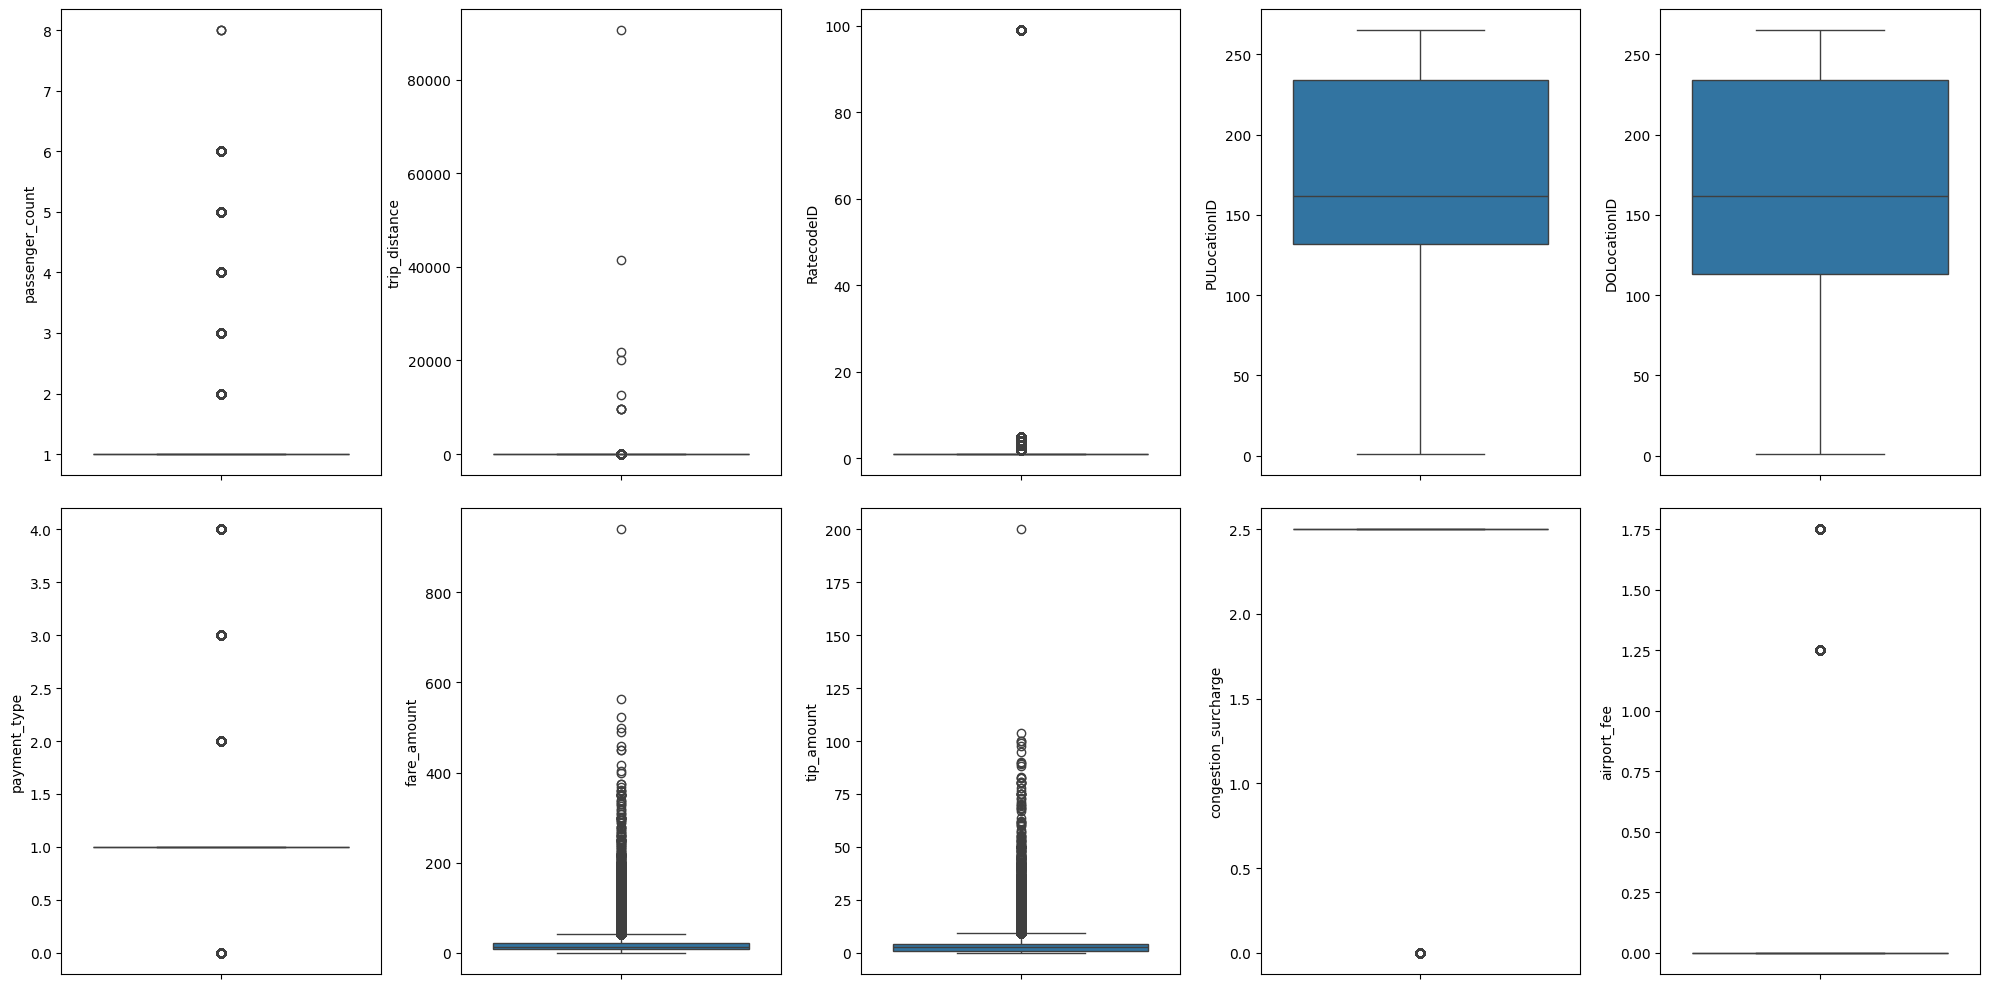

In [67]:
# Check for potential out of place values in various columns

numerical_columns = ['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 'congestion_surcharge', 'airport_fee']
numerical_columns_len = len(numerical_columns)
rows = int(len(numerical_columns) / 2)
fig, axs = plt.subplots(ncols=int(len(numerical_columns) / 2), nrows=2, figsize=(20, 2 * rows))

axs = axs.flatten() if numerical_columns_len > 1 else [axs]  # Ensure axs is iterable
for index, col in enumerate(numerical_columns):
    sns.boxplot(y=col, data=df, ax=axs[index])

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [71]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print(df.shape)

(379265, 19)


In [72]:
# Continue with outlier handling
# Remove entries with zero trip distance
df = df[df['trip_distance'] > 0]
print(df.shape)

(371859, 19)


In [73]:
# Do any columns need standardising?
trip_distance_high = df[df['trip_distance'] > 250]
print(trip_distance_high.shape)
df = df[df['trip_distance'] <= 250]
df = df.reset_index(drop=True)
print(df.shape)


(9, 19)
(371850, 19)


In [74]:
#Check for rows payment type = 0 
invalid_payment_type = df[df['payment_type'] == 0]
print(invalid_payment_type.shape)

(10064, 19)


In [75]:
#Replace entries where payment_type is 0with mod as there is no payment_type 0 defined in the data dictionary
payment_type_mode=df['payment_type'].mode()[0]
df.loc[df['payment_type'] == 0, 'payment_type'] = payment_type_mode
df['payment_type'].value_counts()

payment_type
1    305998
2     62040
4      2494
3      1318
Name: count, dtype: int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [77]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`



Categorisation of the varaibles into Numerical or Categorical :
* `VendorID = categoriccal`
* `tpep_pickup_datetime = numerical`
* `tpep_dropoff_datetime = numerical`
* `passenger_count = categoriccal`
* `trip_distance - numerical`
* `RatecodeID - categorical`
* `PULocationID - numerical`
* `DOLocationID - numerical`
* `payment_type - categorical`
* `pickup_hour - numerical as well as can be used as categorical(Morning, Day & Night) column.`
* `trip_duration - numerical`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

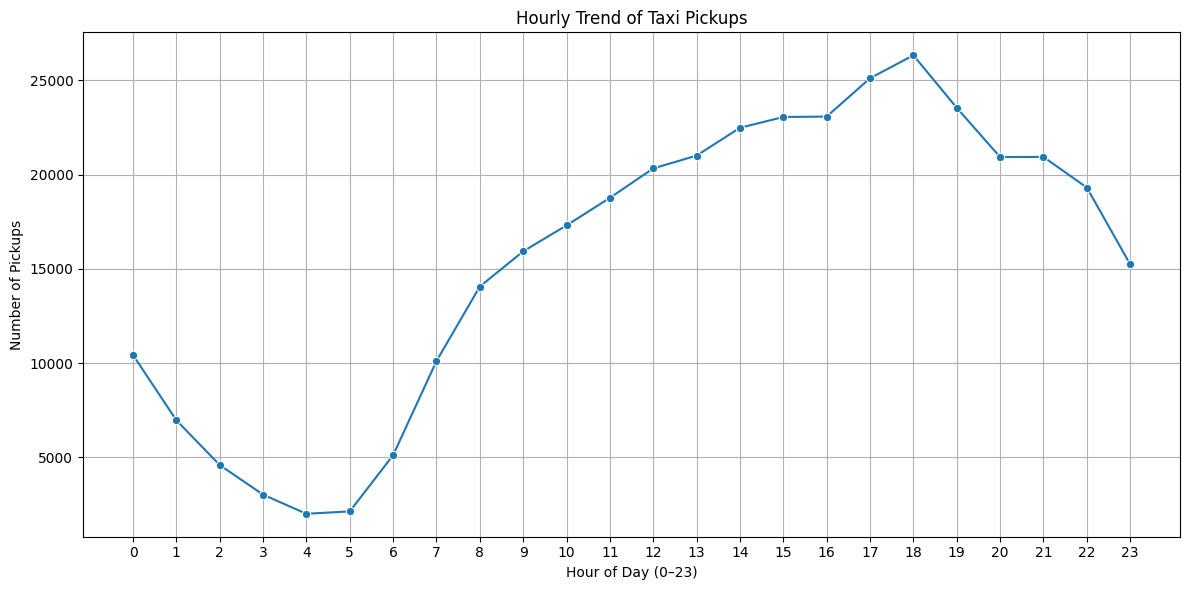

In [83]:
hourly_pickups = df.groupby('pickup_hour').size().reset_index(name='num_pickups')

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='num_pickups', data=hourly_pickups, marker='o')

plt.title('Hourly Trend of Taxi Pickups')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))  # Show every hour
plt.grid(True)
plt.tight_layout()
plt.show()

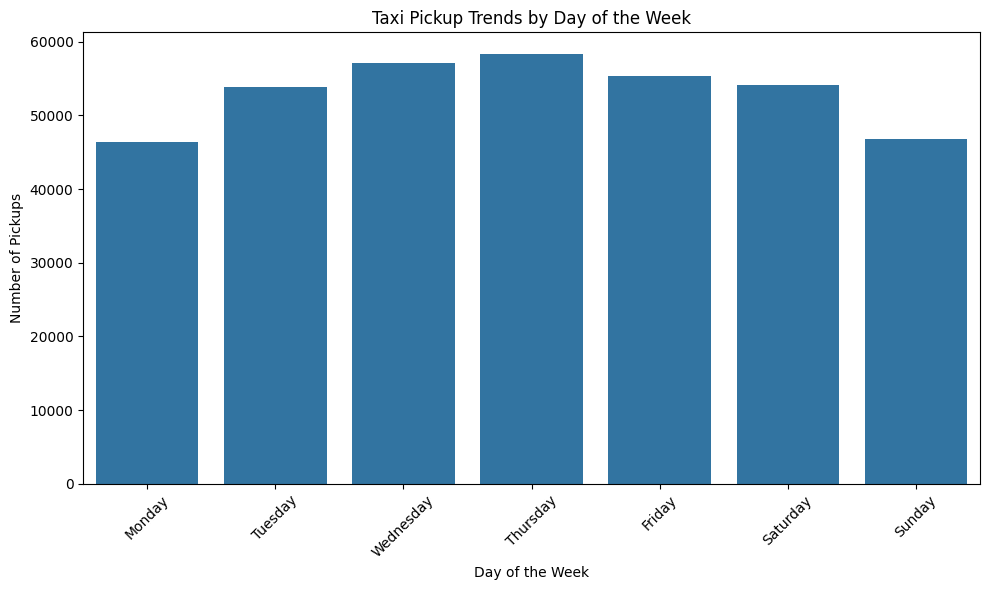

In [84]:
# Find and show the daily trends in taxi pickups (days of the week)
#Extract the day of the week
df['pickup_day'] = df['pickup_date'].dt.day_name()

#count pickups day wise
daily_pickups = df['pickup_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

daily_pickups.columns = ['Day', 'Num_Pickups']

plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Num_Pickups', data=daily_pickups)

plt.title('Taxi Pickup Trends by Day of the Week')
plt.ylabel('Number of Pickups')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

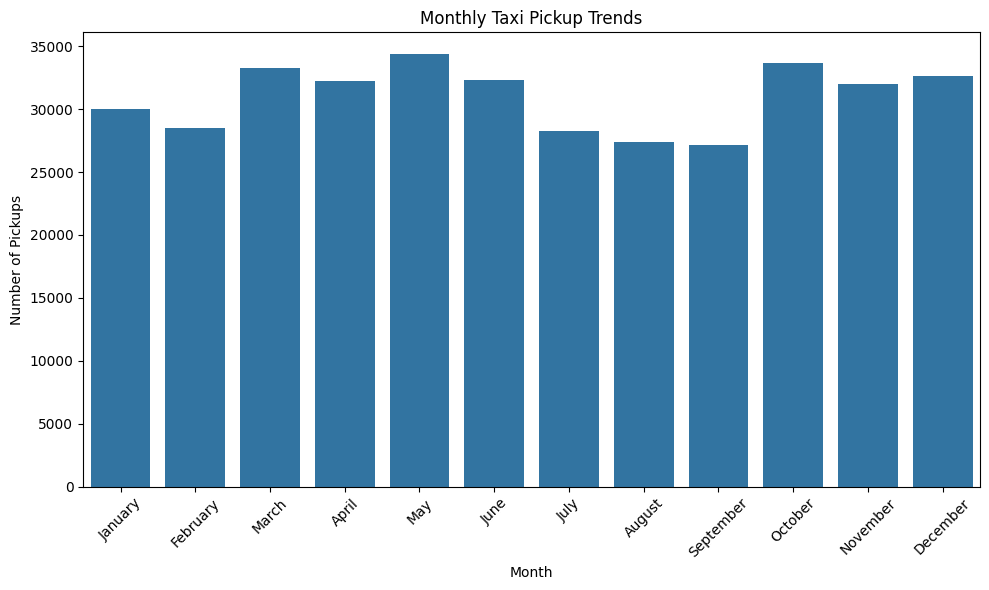

In [85]:
# Show the monthly trends in pickups
#Extract month
df['pickup_month'] = df['pickup_date'].dt.month_name()
df['pickup_month_num'] = df['pickup_date'].dt.month
#Count pick ups month wise
monthly_pickups = df.groupby(['pickup_month_num', 'pickup_month']).size().reset_index(name='num_pickups')
monthly_pickups = monthly_pickups.sort_values(by='pickup_month_num')
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_month', y='num_pickups', data=monthly_pickups)

plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [88]:
# Analyse the above parameters
# Columns to check
cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Loop through each column and check for zero and negative values
for col in cols:
    total = len(df)
    zeros = df[df[col] == 0].shape[0]
    negatives = df[df[col] < 0].shape[0]
    
    print("Column:", col)
    print("  Total rows:", total)
    print("  Zero values:", zeros)
    print("  Negative values:", negatives)
    print()


Column: fare_amount
  Total rows: 371850
  Zero values: 60
  Negative values: 0

Column: tip_amount
  Total rows: 371850
  Zero values: 81476
  Negative values: 0

Column: total_amount
  Total rows: 371850
  Zero values: 20
  Negative values: 0

Column: trip_distance
  Total rows: 371850
  Zero values: 0
  Negative values: 0



There are no negative values for any of these parameters `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. But there are zero values. For fare_amount and total_amount the zero values are negligible. The tip_amount zero values are in significant numbers but look realistic. Nothing needs to be done here. 

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

For fare_amount and total_amount the zero values are negligible. Can be filtered. The tip_amount zero values are in significant numbers and look realistic.So, its not  beneficial to create a copy DataFrame leaving out the zero values from these. 

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

Yes, it's suitable to drop such cases of zero distance as any distance would be more than zero for a valid ride

In [94]:
# Create a df with non zero entries for the selected parameters.
non_zero_negative_df = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()
print(f'non_zero_negative_df: {non_zero_negative_df.shape}')


non_zero_negative_df: (290372, 22)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

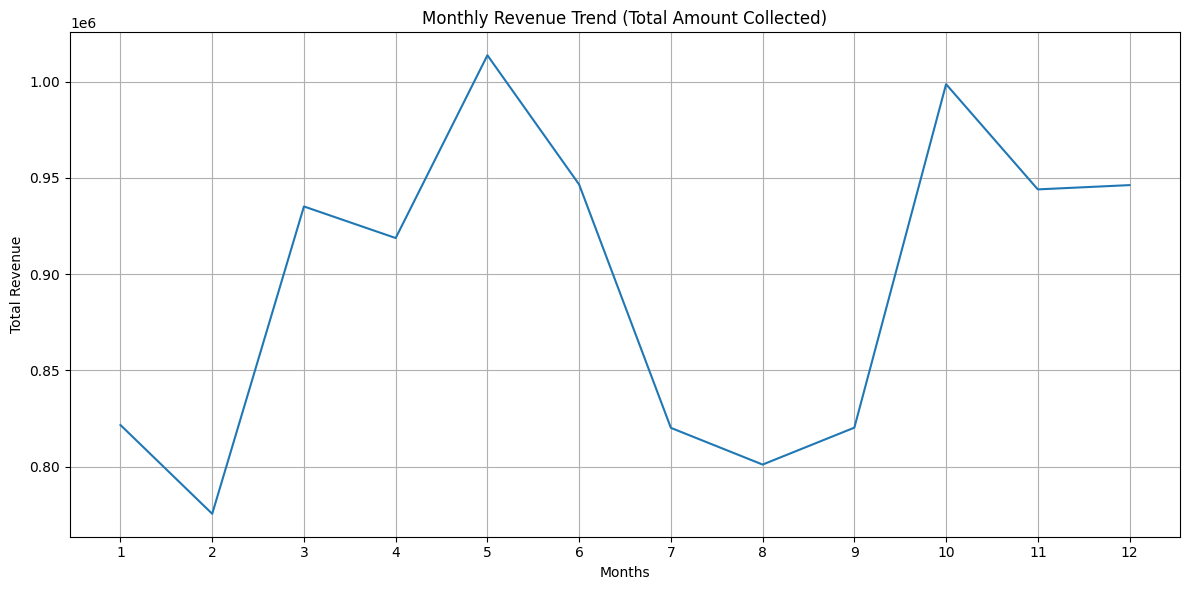

In [96]:
# Group data by month and analyse monthly revenue
#df['year_month'] = df['pickup_date'].dt.to_period('M') 
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue['year_month'] = monthly_revenue['pickup_month'].astype(str)  #converting to str for plotting

#Plotting trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='total_amount', data=monthly_revenue)

plt.title('Monthly Revenue Trend (Total Amount Collected)')
plt.xlabel('Months')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

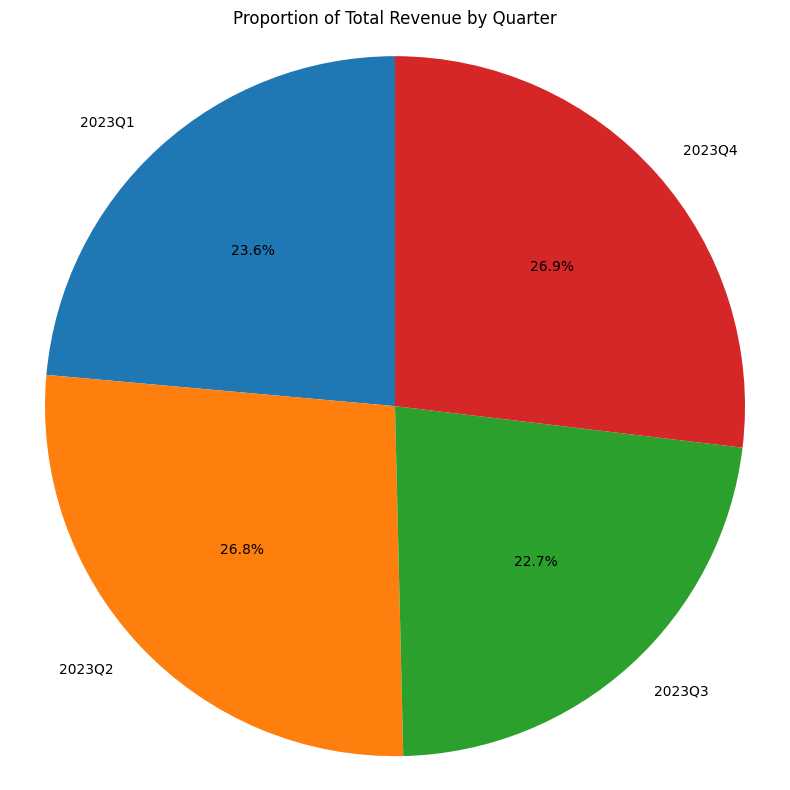

In [98]:
# Calculate proportion of each quarter
#Extract the quarter
df['quarter'] = df['pickup_date'].dt.to_period('Q').astype(str)

#Group by quarter and calculate total revenue
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()) * 100

#Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue['total_amount'], labels=quarterly_revenue['quarter'],
        autopct='%1.1f%%', startangle=90)

plt.title('Proportion of Total Revenue by Quarter')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.tight_layout()
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

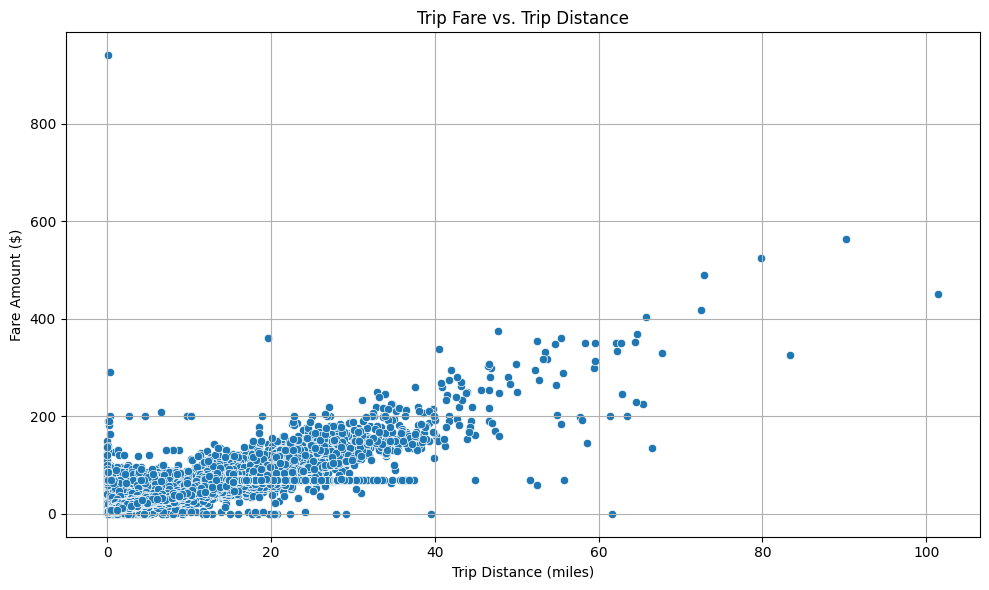

In [100]:
# Show how trip fare is affected by distance
df_filtered = df[ (df['trip_distance'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='fare_amount')

plt.title('Trip Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [101]:
# Calculate the correlation value between trip_distance and fare_amount
correlation_value = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f'Correlation between Trip Distance and Fare Amount: {correlation_value:.2f}')

Correlation between Trip Distance and Fare Amount: 0.94


Correlation value is close to 1 that means there is a string correlation and Trip Distance and Fare Amount are directly proportional

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [115]:
# Show relationship between fare and trip duration

#Calculate trip duration in minutes
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

#Filter unreasonable rows
df_corr = df[
    (df['trip_duration'] > 0) & (df['trip_duration'] < 180) & 
    (df['trip_distance'] > 0) & (df['trip_distance'] < 100) &
    (df['fare_amount'] > 0) & (df['fare_amount'] < 400) 
]

#calculate correlation
corr_1 = df_corr['fare_amount'].corr(df_corr['trip_duration'])
corr_2 = df_corr['fare_amount'].corr(df_corr['passenger_count'])
corr_3 = df_corr['tip_amount'].corr(df_corr['trip_distance'])

print(f"Correlation between fare_amount and trip_duration: {corr_1:.2f}")
print(f"Correlation between fare_amount and passenger_count: {corr_2:.2f}")
print(f"Correlation between tip_amount and trip_distance: {corr_3:.2f}")


Correlation between fare_amount and trip_duration: 0.85
Correlation between fare_amount and passenger_count: 0.04
Correlation between tip_amount and trip_distance: 0.60


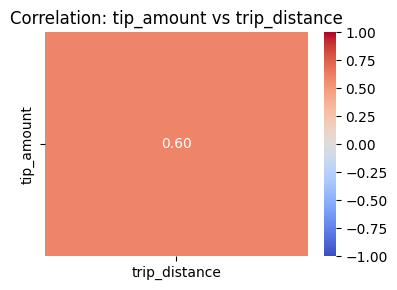

In [121]:
# Show relationship between tip and trip distance
# Calculate the correlation
corr_value = df_corr['tip_amount'].corr(df_corr['trip_distance'])

# Create a 1x1 DataFrame
corr_df = pd.DataFrame([[corr_value]], 
                       index=['tip_amount'], 
                       columns=['trip_distance'])

# Plot the heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

plt.title('Correlation: tip_amount vs trip_distance')
plt.tight_layout()
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [107]:
# Analyse the distribution of different payment types (payment_type).
#Count occurrences
payment_counts = df['payment_type'].value_counts().sort_index()
print(payment_counts)


In [123]:
payment_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}

df['payment_type_label'] = df['payment_type'].map(payment_labels)

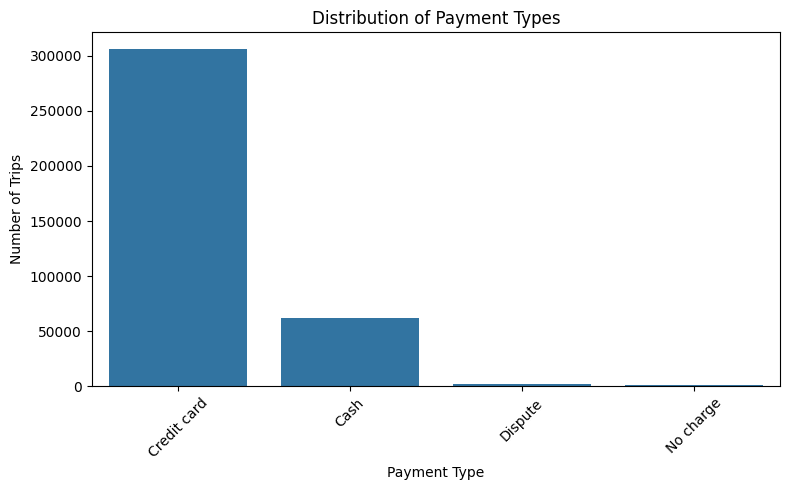

In [125]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='payment_type_label', order=df['payment_type_label'].value_counts().index)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



Credit card is the most used payment type. 

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [131]:
pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ------- -------------------------------- 3.7/19.2 MB 19.8 MB/s eta 0:00:01
   ----------------- ---------------------- 8.4/19.2 MB 20.8 MB/s eta 0:00:01
   --------------------------- ------------ 13.4/19.2 MB 21.5 MB/s eta 0:00:01
   ------------------------------------- -- 18.1/19.2 MB 21.5 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 20.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------------------- -------------- 3.9/6.3 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 20.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 18.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [133]:
import geopandas as gpd


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [153]:

# Read the shapefile using geopandas
zones = gpd.read_file('D:\\Upgrad\\Project 1 - Taxi Project\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\taxi_zones')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

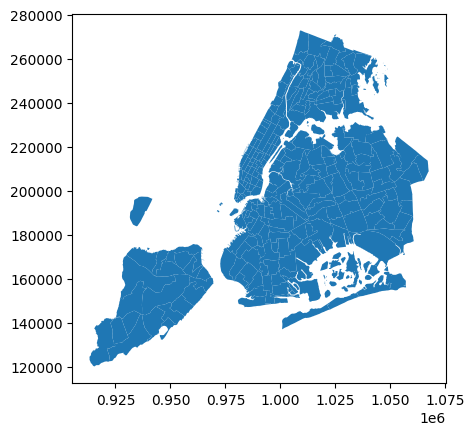

In [155]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [231]:
# Merge zones and trip records using locationID and PULocationID

# Merge zones and trip records using LocationID and PULocationID
merged_df = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the first few rows of the merged DataFrame
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:17   2023-01-01 01:22:53                4   
1         2  2023-01-01 00:13:45   2023-01-01 00:28:02                1   
2         2  2023-01-01 00:28:53   2023-01-01 00:39:49                1   
3         1  2023-01-01 00:55:59   2023-01-01 01:05:15                2   
4         2  2023-01-01 00:12:05   2023-01-01 00:46:32                3   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.02           1           231            24             1   
1           2.34           1           161            79             1   
2           1.82           1           186           211             1   
3           2.20           1            79           229             2   
4           3.31           1           246           239             1   

   fare_amount  ...  borough_dropoff  \
0         49.2  ...        Manhattan   
1         15.6  ...        Manhattan   
2         12.1  ...        Manhattan   
3         11.4  ...        Manhattan   
4         31.7  ...        Manhattan   

                                    geometry_dropoff  day_type  OBJECTID  \
0  POLYGON ((995453.114 230274.267, 995312.583 23...   Weekend     231.0   
1  POLYGON ((988746.067 202151.955, 988733.885 20...   Weekend     161.0   
2  POLYGON ((983827.65 201526.658, 983727.737 201...   Weekend     186.0   
3  POLYGON ((994880.664 214401.395, 994724.359 21...   Weekend      79.0   
4  POLYGON ((991168.979 226252.992, 991955.565 22...   Weekend     246.0   

   Shape_Leng  Shape_Area                          zone LocationID    borough  \
0    0.063420    0.000167          TriBeCa/Civic Center      231.0  Manhattan   
1    0.035804    0.000072                Midtown Center      161.0  Manhattan   
2    0.024696    0.000037  Penn Station/Madison Sq West      186.0  Manhattan   
3    0.042625    0.000108                  East Village       79.0  Manhattan   
4    0.069467    0.000281     West Chelsea/Hudson Yards      246.0  Manhattan   

                                            geometry  
0  POLYGON ((981667.364 203305, 981854.109 203130...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((986752.603 210853.699, 986627.863 21...  
3  POLYGON ((988746.067 202151.955, 988733.885 20...  
4  POLYGON ((983031.177 217138.506, 983640.32 216...  

[5 rows x 47 columns]

In [233]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_date', 'pickup_hour',
       'pickup_day', 'pickup_month', 'pickup_month_num', 'quarter',
       'trip_duration', 'payment_type_label', 'OBJECTID_pickup',
       'Shape_Leng_pickup', 'Shape_Area_pickup', 'zone_pickup',
       'LocationID_pickup', 'borough_pickup', 'geometry_pickup',
       'OBJECTID_dropoff', 'Shape_Leng_dropoff', 'Shape_Area_dropoff',
       'zone_dropoff', 'LocationID_dropoff', 'borough_dropoff',
       'geometry_dropoff', 'day_type'],
      dtype='object')


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [239]:
# Group data by PULocationID and calculate the number of trips for each location
trips_per_location = merged_df.groupby('PULocationID').size().reset_index(name='total_trips')

# Display the first few rows of the result
trips_per_location.head()

PULocationID  total_trips
0             1           14
1             3            9
2             4          425
3             5            4
4             6            3

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [249]:
# Merge trip counts back to the zones GeoDataFrame
zone_pickup_counts = df.groupby('zone_pickup').size().reset_index(name='pickup_trip_count')
zone_dropoff_counts = df.groupby('zone_dropoff').size().reset_index(name='dropoff_trip_count')
zone_trip_counts = pd.merge(zone_pickup_counts, 
                            zone_dropoff_counts, 
                            left_on='zone_pickup', 
                            right_on='zone_dropoff', 
                            how='outer', 
                            suffixes=('_pickup', '_dropoff'))

#df['zone_pickup'].value_counts()

zone_trip_counts.head()



zone_pickup  pickup_trip_count             zone_dropoff  \
0  Allerton/Pelham Gardens                9.0  Allerton/Pelham Gardens   
1            Alphabet City              425.0            Alphabet City   
2            Arden Heights                4.0            Arden Heights   
3  Arrochar/Fort Wadsworth                3.0  Arrochar/Fort Wadsworth   
4                  Astoria              163.0                  Astoria   

   dropoff_trip_count  
0                  33  
1                1470  
2                  10  
3                   9  
4                1071

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

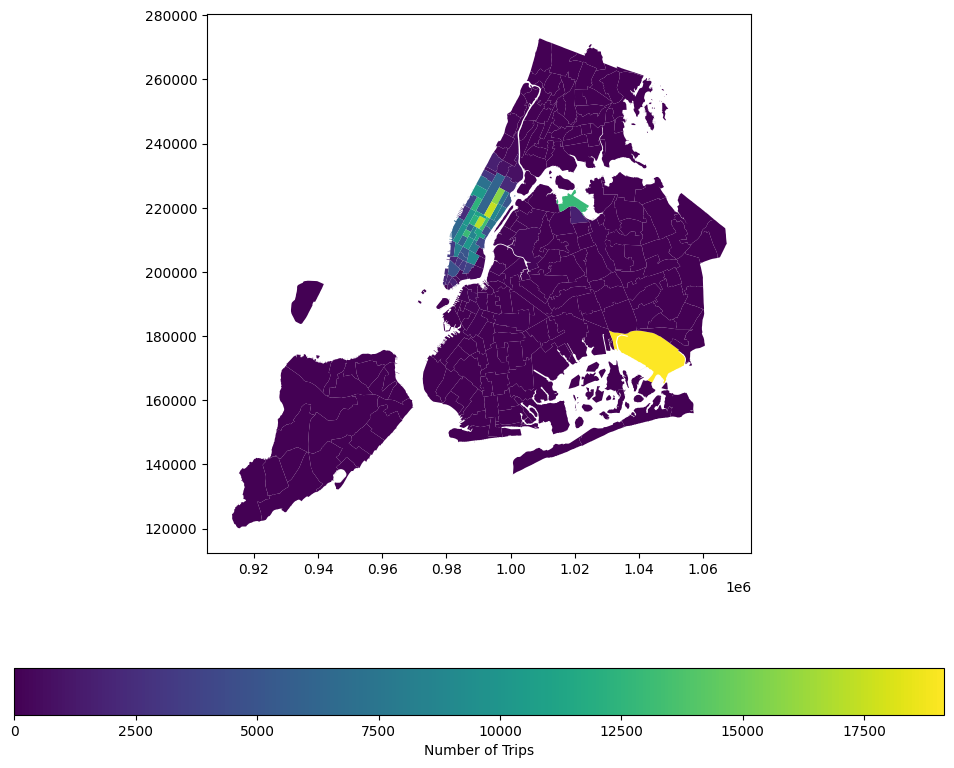

In [247]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it

trip_counts_df = df.groupby('PULocationID').size().reset_index(name='trip_count')
#print(trip_counts_df.head())
zones_trip = zones.merge(
    trip_counts_df,
    how='left',
    left_on='LocationID', 
    right_on='PULocationID'  
)
zones_trip['trip_count'] = zones_trip['trip_count'].fillna(0)
#print(zones_trip)
zones_trip.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.show()



In [251]:
# can you try displaying the zones DF sorted by the number of trips?
zones_trip_sorted = zones_trip.sort_values(by='trip_count', ascending=False)
zones_trip_sorted.head()


OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     PULocationID  trip_count  
131         132.0     19154.0  
236         237.0     17443.0  
160         161.0     17180.0  
235         236.0     15733.0  
161         162.0     13250.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [253]:
# Find routes which have the slowest speeds at different times of the day
#find avg_time taken from pickup_loc to drop_loc in hourly distribution
avg_trip_duration = df.groupby(['zone_pickup', 'zone_dropoff', 'pickup_hour'])['trip_duration'].mean().reset_index()
#avg_trip_duration
#find avg_speed with unique records
avg_speed = pd.merge(df[['zone_pickup', 'zone_dropoff', 'pickup_hour', 'trip_distance']].drop_duplicates(),
                        avg_trip_duration, on=['zone_pickup', 'zone_dropoff', 'pickup_hour'])
#avg_speed
avg_speed['average_speed'] = avg_speed['trip_distance'] / avg_speed['trip_duration']
#avg_speed_sort = avg_speed.sort_values(by='average_speed')
#avg_speed_sort.head()
avg_speed_gt_thn_zero = avg_speed[avg_speed['average_speed'] > 0]
avg_speed_sort = avg_speed_gt_thn_zero.sort_values(by='average_speed')
# The below records shows top 5 slow routes.
avg_speed_sort.head()


zone_pickup                   zone_dropoff  \
294180                  Midtown South                  Midtown South   
165392        Queensbridge/Ravenswood        Queensbridge/Ravenswood   
22423   Meatpacking/West Village West  Meatpacking/West Village West   
188201                  East Elmhurst              LaGuardia Airport   
167283                    JFK Airport                 Midtown Center   

        pickup_hour  trip_distance  trip_duration  average_speed  
294180           15           0.01     114.557143       0.000087  
165392           18           0.13    1339.150000       0.000097  
22423             0           0.02     183.729167       0.000109  
188201           13           0.01      75.277778       0.000133  
167283           14           0.01      73.261616       0.000136

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

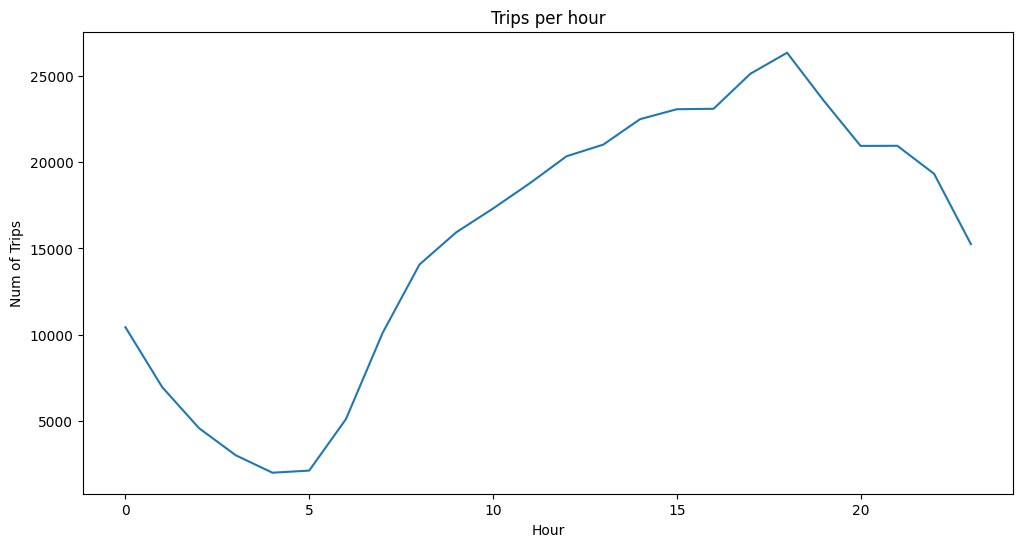

In [173]:
# Visualise the number of trips per hour and find the busiest hour
df.columns
hourly_trips = df['pickup_hour'].value_counts().sort_index()
#hourly_trips
plt.figure(figsize=(12,6))
plt.plot(hourly_trips.index, hourly_trips.values)
plt.xlabel('Hour')
plt.ylabel('Num of Trips')
plt.title('Trips per hour')
plt.show()

In [179]:
#busiest hour finding
busiest_hour = hourly_trips.idxmax()
print(busiest_hour)

18


Busiest hour is 18th hour

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [188]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.01
zones_trip_sorted['actual_trip_count'] = zones_trip_sorted['trip_count'] / sample_fraction
zones_trip_sorted

OBJECTID  Shape_Leng  Shape_Area  \
131       132    0.245479    0.002038   
236       237    0.042213    0.000096   
160       161    0.035804    0.000072   
235       236    0.044252    0.000103   
161       162    0.035270    0.000048   
..        ...         ...         ...   
110       111    0.059931    0.000209   
114       115    0.116169    0.000373   
186       187    0.126868    0.000421   
220       221    0.166218    0.000890   
102       103    0.014306    0.000006   

                                              zone  LocationID        borough  \
131                                    JFK Airport         132         Queens   
236                          Upper East Side South         237      Manhattan   
160                                 Midtown Center         161      Manhattan   
235                          Upper East Side North         236      Manhattan   
161                                   Midtown East         162      Manhattan   
..                                             ...         ...            ...   
110                            Green-Wood Cemetery         111       Brooklyn   
114                            Grymes Hill/Clifton         115  Staten Island   
186                                  Port Richmond         187  Staten Island   
220                                      Stapleton         221  Staten Island   
102  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   

                                              geometry  PULocationID  \
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...         132.0   
236  POLYGON ((993633.442 216961.016, 993507.232 21...         237.0   
160  POLYGON ((991081.026 214453.698, 990952.644 21...         161.0   
235  POLYGON ((995940.048 221122.92, 995812.322 220...         236.0   
161  POLYGON ((992224.354 214415.293, 992096.999 21...         162.0   
..                                                 ...           ...   
110  POLYGON ((985590.381 179611.82, 986202.162 179...           NaN   
114  POLYGON ((961850.466 167915.309, 961831.926 16...           NaN   
186  MULTIPOLYGON (((946964.115 173161.64, 946977.8...           NaN   
220  POLYGON ((963349.728 171627.581, 963397.759 17...           NaN   
102  POLYGON ((972079.575 190732.429, 972184.766 19...           NaN   

     trip_count  actual_trip_count  
131     19154.0          1915400.0  
236     17443.0          1744300.0  
160     17180.0          1718000.0  
235     15733.0          1573300.0  
161     13250.0          1325000.0  
..          ...                ...  
110         0.0                0.0  
114         0.0                0.0  
186         0.0                0.0  
220         0.0                0.0  
102         0.0                0.0  

[263 rows x 10 columns]

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

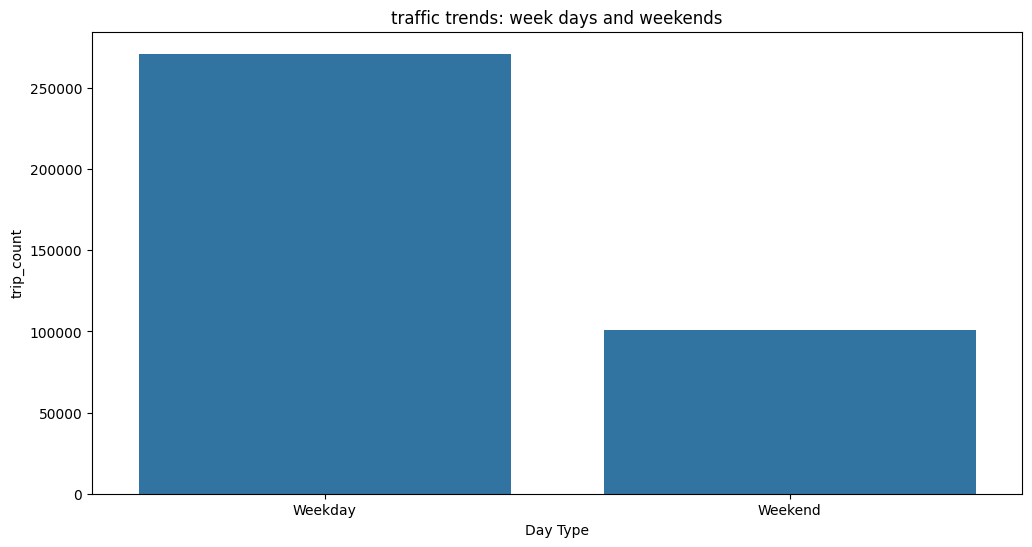

In [257]:

# Compare traffic trends for the week days and weekends
#df.columns
#df['pickup_day'] = this has weekday
#add categorical column to identify record as weekday or weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

#df['day_type'] = df['pickup_day'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
df['day_type'] = df['pickup_day'].apply(lambda x: 'Weekday' if x in weekdays else 'Weekend')
#df.head()
#group by day_type
traffic_trends = df.groupby('day_type')['trip_distance'].count().reset_index(name='trip_count')

#traffic_trends - Ans: Weekdays has more traffic in comparison to weekends - as taxi covers more distance than weekends
#EDA
plt.figure(figsize=(12,6))
sns.barplot(x='day_type', y='trip_count', data=traffic_trends)
plt.title('traffic trends: week days and weekends')
plt.xlabel('Day Type')
plt.ylabel('trip_count')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Post 3PM busy hours start and peak around 6PM.  Morning and late-night hours are having lesser rides. Weekdays are overall busier than weekends.  Knowing the above pattern help to Maximize efficiency, Improve customer experience, Increase revenue and also could help Support better city planning

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [193]:
# Find top 10 pickup and dropoff zones
#Top 10 pick up zones
pickup_counts = df.groupby(['zone_pickup', 'pickup_hour']).size().reset_index(name='pickup_count')
# groupby zone_pickup on pickup_count and find aggregation and filter with top 10
top_pickup_zones = pickup_counts.groupby('zone_pickup')['pickup_count'].sum().nlargest(10).reset_index()
print(top_pickup_zones)

                    zone_pickup  pickup_count
0                   JFK Airport         19154
1         Upper East Side South         17443
2                Midtown Center         17180
3         Upper East Side North         15733
4                  Midtown East         13250
5  Penn Station/Madison Sq West         12998
6             LaGuardia Airport         12877
7           Lincoln Square East         12430
8     Times Sq/Theatre District         12239
9                   Murray Hill         11113


In [195]:
# top 10 dropoff zones
dropoff_counts = df.groupby(['zone_dropoff', 'pickup_hour']).size().reset_index(name='dropoff_count')
#dropoff_counts
top_dropoff_zones = dropoff_counts.groupby('zone_dropoff')['dropoff_count'].sum().nlargest(10).reset_index()
print(top_dropoff_zones)

                zone_dropoff  dropoff_count
0      Upper East Side North          16434
1      Upper East Side South          15648
2             Midtown Center          14582
3  Times Sq/Theatre District          11404
4                Murray Hill          11064
5               Midtown East          10759
6        Lincoln Square East          10593
7      Upper West Side South          10513
8            Lenox Hill West           9831
9               East Chelsea           9569


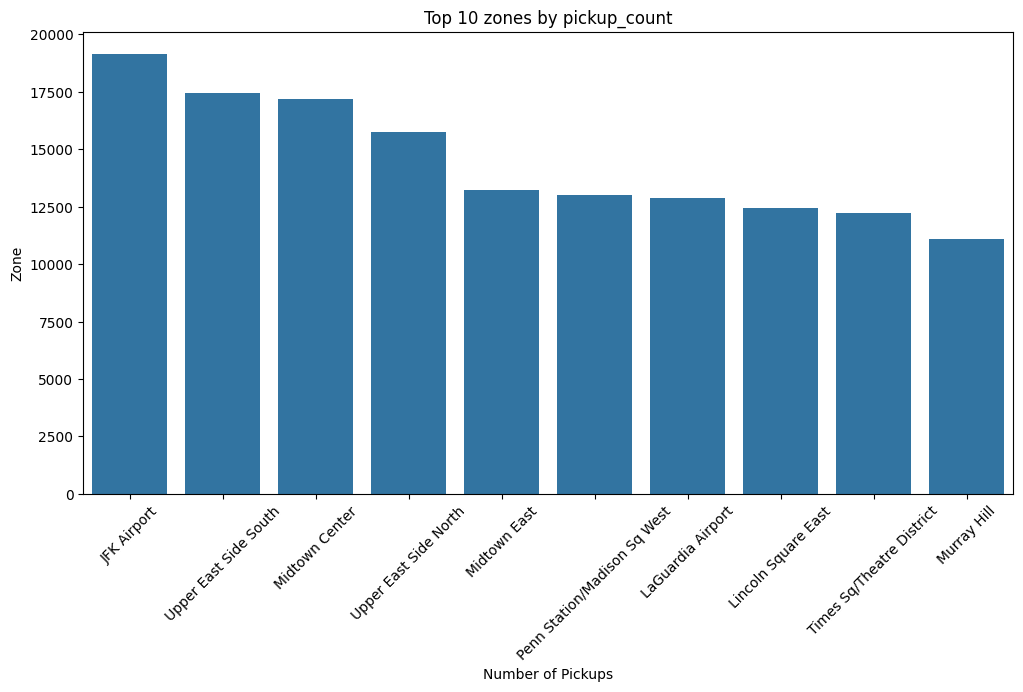

In [201]:
#Plotting top 10 pickup zones
plt.figure(figsize=(12, 6))
sns.barplot(x='zone_pickup', y='pickup_count', data=top_pickup_zones)
plt.title('Top 10 zones by pickup_count')
plt.xlabel('Number of Pickups')
plt.xticks(rotation=45)
plt.ylabel('Zone')
plt.show()

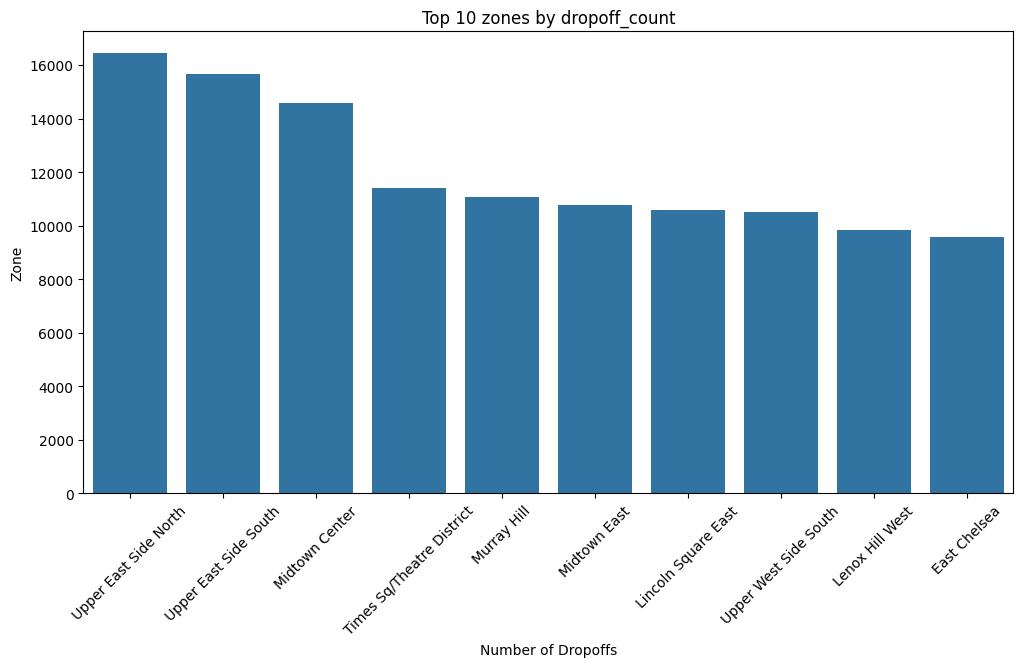

In [203]:
#Plotting top 10 drop off zones
plt.figure(figsize=(12, 6))
sns.barplot(x='zone_dropoff', y='dropoff_count', data=top_dropoff_zones)
plt.title('Top 10 zones by dropoff_count')
plt.xlabel('Number of Dropoffs')
plt.xticks(rotation=45)
plt.ylabel('Zone')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [259]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
#df.columns
#groupby pickuplocation and derive pickup_count
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_count')
#pickup_counts
#groupby dropofflocation and derive dropoff_count
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoff_count')
#dropoff_counts
# Combine
pickup_dropoff_combine = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', suffixes=('_pickup', '_dropoff'))
#pickup_dropoff_combine
# pickup/dropoff ratio
pickup_dropoff_combine['pickup_dropoff_ratio'] = pickup_dropoff_combine['pickup_count'] / pickup_dropoff_combine['dropoff_count']
#ratio of pickups and dropoffs in each zone 
print(pickup_dropoff_combine['pickup_dropoff_ratio'] )

0      0.012868
1      0.272727
2      0.289116
3      0.400000
4      0.333333
         ...   
234    1.066921
235    0.900269
236    0.923824
237    0.946434
238    0.113667
Name: pickup_dropoff_ratio, Length: 239, dtype: float64


In [261]:
##find highest 10 ratios
pickup_dropoff_ratio_sort = pickup_dropoff_combine.sort_values(by='pickup_dropoff_ratio', ascending=False)
# top 10
pickup_dropoff_ratio_sort.head(10) 

PULocationID  pickup_count  DOLocationID  dropoff_count  \
62             70          1661            70            182   
115           132         19154           132           4304   
121           138         12877           138           4740   
167           186         12998           186           8014   
98            114          4927           114           3523   
38             43          6096            43           4553   
224           249          8302           249           6213   
145           162         13250           162          10759   
71             79          8956            79           7411   
146           163         10928           163           9164   

     pickup_dropoff_ratio  
62               9.126374  
115              4.450279  
121              2.716667  
167              1.621912  
98               1.398524  
38               1.338897  
224              1.336230  
145              1.231527  
71               1.208474  
146              1.192492

In [263]:
##find lowest 10 ratios
pickup_dropoff_ratio_sort = pickup_dropoff_combine.sort_values(by='pickup_dropoff_ratio', ascending=True)
# lowest 10
pickup_dropoff_ratio_sort.head(10) 

PULocationID  pickup_count  DOLocationID  dropoff_count  \
0               1            14             1           1088   
56             64             1            64             59   
226           252             2           252             64   
143           160             4           160            118   
178           198             8           198            210   
26             31             1            31             22   
154           171             3           171             59   
116           133             6           133            117   
181           202            12           202            234   
194           217             7           217            126   

     pickup_dropoff_ratio  
0                0.012868  
56               0.016949  
226              0.031250  
143              0.033898  
178              0.038095  
26               0.045455  
154              0.050847  
116              0.051282  
181              0.051282  
194              0.055556

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [267]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
#night hour between 11pm to 5am
night_hours_11_to_5 = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5 )]
#night_hours_11_to_5
# count night pickups and apply sorting from most to least
night_pickup_counts = (
    night_hours_11_to_5.groupby('PULocationID')
    .size()
    .reset_index(name='night_pickup_count')
    .sort_values(by='night_pickup_count', ascending=False)
)


In [271]:
#dropoff night
#df.columns
night_dropoff_counts = (
    night_hours_11_to_5.groupby('DOLocationID')
    .size()
    .reset_index(name='night_dropoff_count')
    .sort_values(by='night_dropoff_count', ascending=False)
)
# top 10
print(night_dropoff_counts.head(10))

     DOLocationID  night_dropoff_count
73             79                 1656
43             48                 1395
156           170                 1379
62             68                 1203
97            107                 1184
127           141                 1150
241           263                 1004
229           249                 1001
211           230                  948
210           229                  912


In [269]:
# top 10
print(night_pickup_counts.head(10))

     PULocationID  night_pickup_count
56             79                3284
91            132                2920
182           249                2577
33             48                2056
102           148                2056
81            114                1779
166           230                1616
130           186                1448
114           164                1299
46             68                1275


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

  period  total_revenue
0    Day     9433262.28
1  Night     1313705.97


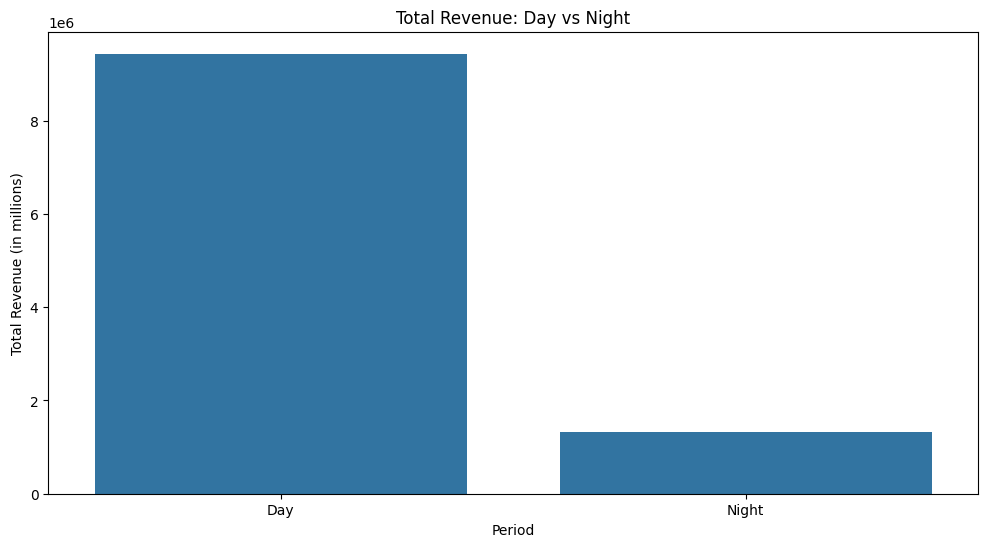

In [277]:
# add cetegorical column - Night/Day
df['period'] = df['pickup_hour'].apply(lambda x: 'Night' if(x >= 23 or x<= 5) else 'Day')
# group by period and aggregate the total_amount
revenue_by_period = df.groupby('period')['total_amount'].sum().reset_index(name='total_revenue')
print(revenue_by_period)
#Day time revenue is more and its obvoius as in night has 1/4th of the total hrs

#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='period', y='total_revenue', data=revenue_by_period)
plt.title('Total Revenue: Day vs Night')
plt.xlabel('Period')
plt.ylabel('Total Revenue (in millions)')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [283]:
# Analyse the fare per mile per passenger for different passenger counts

# find fare per mile
df['fare_per_mile'] = df.apply(
    lambda x: x['fare_amount'] / x['trip_distance'] if x['trip_distance'] > 0 else 0,
    axis=1
)
#df['fare_per_mile']
#groupby passenger_count
avg_fare_per_mile = df.groupby('passenger_count')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')
print(avg_fare_per_mile)
#there is no trend that as the passenger increases than fare per mile should increase or decrease.
#Actually, its increasing till 4 passenger_count and than sudden decrease.


   passenger_count  avg_fare_per_mile
0                1          10.436522
1                2          13.042615
2                3          12.531280
3                4          16.688533
4                5          11.443267
5                6          10.486216


Text(0, 0.5, 'Average Fare per Mile')

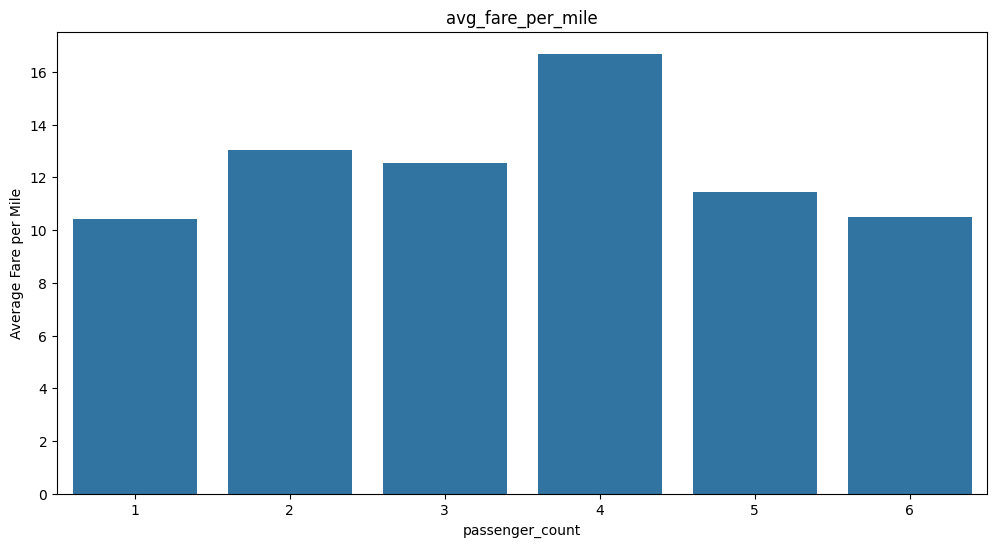

In [285]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_count', y='avg_fare_per_mile', data=avg_fare_per_mile)
plt.title('avg_fare_per_mile')
plt.xlabel('passenger_count')
plt.ylabel('Average Fare per Mile')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [287]:
# Compare fare per mile for different vendors
#df.columns
#df['VendorID'].value_counts()
avg_fare_per_mile_vendor = df.groupby('VendorID')['fare_per_mile'].mean().reset_index(name='avg_fare_per_mile')
print(avg_fare_per_mile_vendor)
# Vendor 2 has high avg_fare_per_mile

   VendorID  avg_fare_per_mile
0         1           8.086672
1         2          12.071287
2         6           6.358682


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

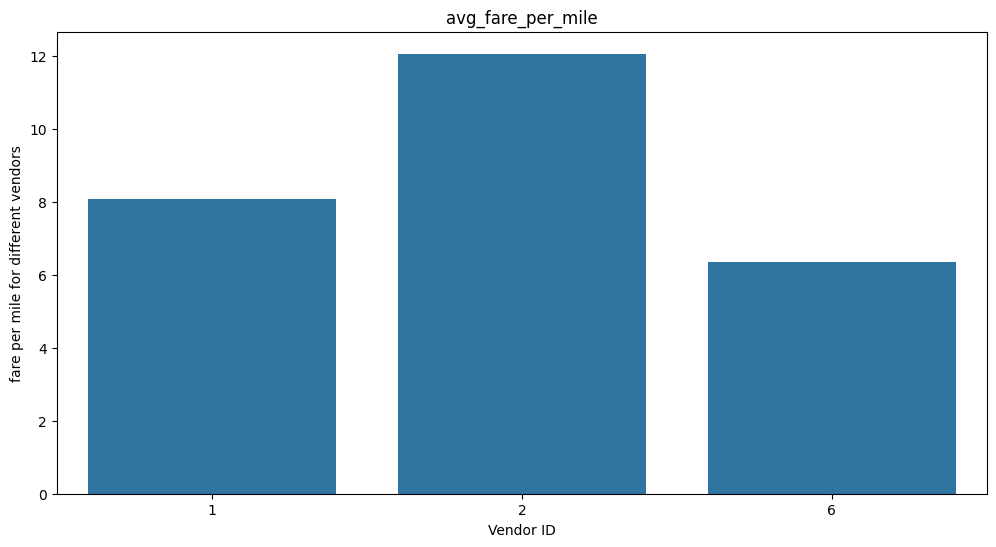

In [291]:
# Compare fare per mile for different vendors
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='VendorID', y='avg_fare_per_mile', data=avg_fare_per_mile_vendor)
plt.title('avg_fare_per_mile')
plt.xlabel('Vendor ID')
plt.ylabel('fare per mile for different vendors')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [295]:
# Defining distance tiers

distance_tiers = [
    (0, 2),
    (2, 5),
    (5, float('inf'))
]

# Initialize a list to store the results
results = []

# Loop through each distance tier
for min_distance, max_distance in distance_tiers:
    # Filter the data for the current distance tier
    tier_df = merged_df[(merged_df['trip_distance'] > min_distance) & (merged_df['trip_distance'] <= max_distance)]
    
    # Group by VendorID and calculate the average fare per mile
    avg_fare_per_mile = tier_df.groupby('VendorID').apply(lambda x: (x['fare_amount'] / x['trip_distance']).mean()).reset_index()
    avg_fare_per_mile.columns = ['VendorID', 'avg_fare_per_mile']
    
    # Add the distance tier information
    avg_fare_per_mile['distance_tier'] = f'{min_distance} - {max_distance} miles'
    
    # Append the results to the list
    results.append(avg_fare_per_mile)

# Concatenate the results into a single DataFrame
fare_rate_comparison = pd.concat(results, ignore_index=True)

# Display the results
fare_rate_comparison

VendorID  avg_fare_per_mile  distance_tier
0         1           9.858293    0 - 2 miles
1         2          17.508865    0 - 2 miles
2         6          22.143910    0 - 2 miles
3         1           6.388772    2 - 5 miles
4         2           6.535765    2 - 5 miles
5         6           8.326633    2 - 5 miles
6         1           4.419199  5 - inf miles
7         2           4.497922  5 - inf miles
8         6           4.642525  5 - inf miles

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [299]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
#find tip percentage
df['tip_percentage'] = df.apply(
    lambda x: (x['tip_amount'] / x['fare_amount']) * 100 if x['fare_amount'] > 0 else 0,
    axis=1
)
#df['tip_percentage']
#Lets divide trip_distance as short, medium, long distance
distance_bins = [0, 10, 20, float('inf')]
distance_labels = ['Short Trip', 'Medium Trip', 'Long Trip']
#create categorical column
df['distance_category'] = pd.cut(df['trip_distance'], bins=distance_bins, labels=distance_labels, right=False)
print(df['distance_category'].value_counts()) 
#now find tips based on distance_category
avg_tip_distance_category = df.groupby('distance_category')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')
print(avg_tip_distance_category)
#Long trip generates more tips and medium trip shows less tips.

distance_category
Short Trip     338978
Medium Trip     28840
Long Trip        4145
Name: count, dtype: int64
  distance_category  avg_tip_percentage
0        Short Trip           20.689835
1       Medium Trip           15.956141
2         Long Trip           14.200931


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_21560\3411392157.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_distance_category = df.groupby('distance_category')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')


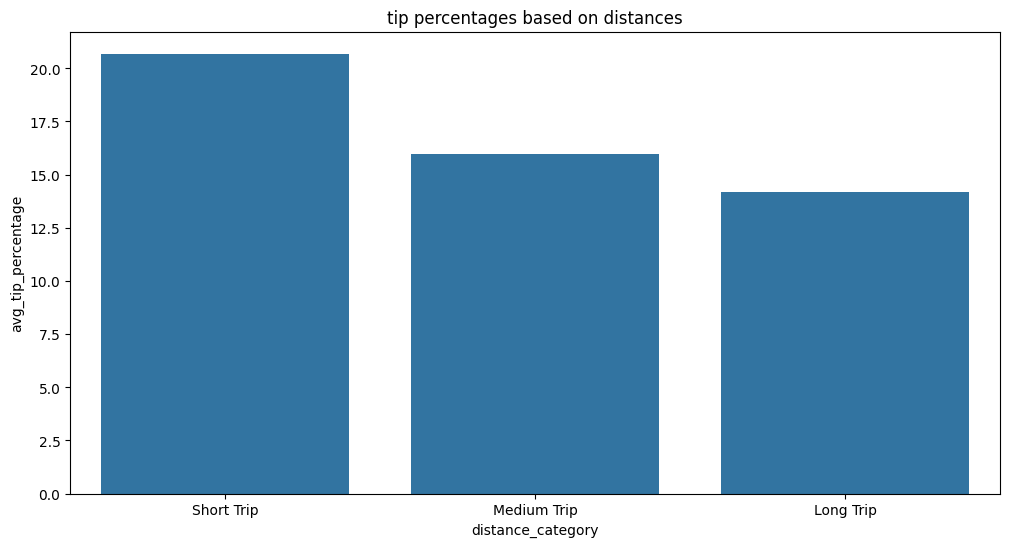

In [301]:
#plot
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_category', y='avg_tip_percentage', data=avg_tip_distance_category)
plt.title('tip percentages based on distances')
plt.xlabel('distance_category')
plt.ylabel('avg_tip_percentage')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [303]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
#tips by num of passenger
avg_tip_passenger = df.groupby('passenger_count')['tip_percentage'].mean().reset_index(name='avg_tip_percentage')
print(avg_tip_passenger)
# no trend its constant. irrespective of passenger count tip_percentage remains same.


   passenger_count  avg_tip_percentage
0                1           20.461079
1                2           19.795395
2                3           19.033357
3                4           17.415174
4                5           20.548339
5                6           20.645749


In [305]:
#lets divide the tips as low tip, avg tip and high tip.
tips_bins = [0, 10, 25, float('inf')]
tips_labels = ['low tip', 'avg tip', 'high tip']
df['tip_category'] = pd.cut(df['tip_percentage'], 
                             bins=tips_bins, 
                             labels=tips_labels, 
                             right=False)

low_tip = df[df['tip_category'] == 'low tip']
high_tip = df[df['tip_category'] == 'high tip']

# Check the number of trips in each category
print(df['tip_category'].value_counts())
# high tip is more.

tip_category
high tip    165798
avg tip     108608
low tip      97557
Name: count, dtype: int64


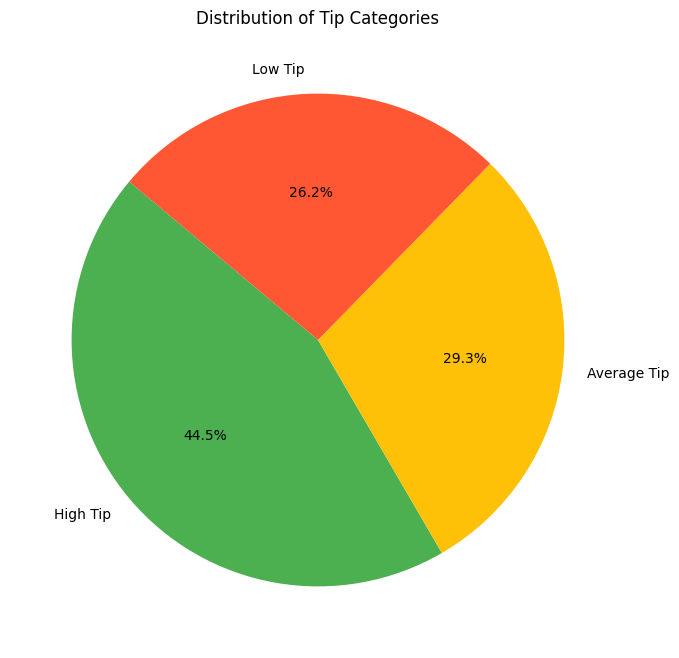

In [307]:
#pie-chart
plt.figure(figsize=(8, 8))
labels = ['High Tip', 'Average Tip', 'Low Tip']
values = [828386, 545533, 487849]
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FFC107', '#FF5733'])
plt.title('Distribution of Tip Categories')
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [311]:
# See how passenger count varies across hours and days

#df['pickup_day']
psg_count_on_hourly_basis = df.groupby('pickup_hour')['passenger_count'].mean().reset_index(name='psg_count_per_hr')
print(psg_count_on_hourly_basis)



    pickup_hour  psg_count_per_hr
0             0          1.415118
1             1           1.43308
2             2          1.415271
3             3          1.429894
4             4          1.389165
5             5          1.264045
6             6          1.256641
7             7          1.266871
8             8          1.282161
9             9          1.311013
10           10          1.356322
11           11          1.359327
12           12          1.369782
13           13          1.385695
14           14          1.394005
15           15          1.394918
16           16          1.391788
17           17          1.382401
18           18          1.374203
19           19          1.382192
20           20          1.403505
21           21           1.41714
22           22          1.424645
23           23          1.416732


In [313]:
#days
#df['pickup_day']
psg_count_day = df.groupby('pickup_day')['passenger_count'].mean().reset_index(name='psg_count_per_day')
print(psg_count_day)

  pickup_day  psg_count_per_day
0     Friday           1.391421
1     Monday           1.348688
2   Saturday           1.466921
3     Sunday           1.457309
4   Thursday           1.335452
5    Tuesday           1.331254
6  Wednesday           1.327357


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_21560\1078128740.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zones_with_passenger_count['passenger_count'].fillna(0, inplace=True)


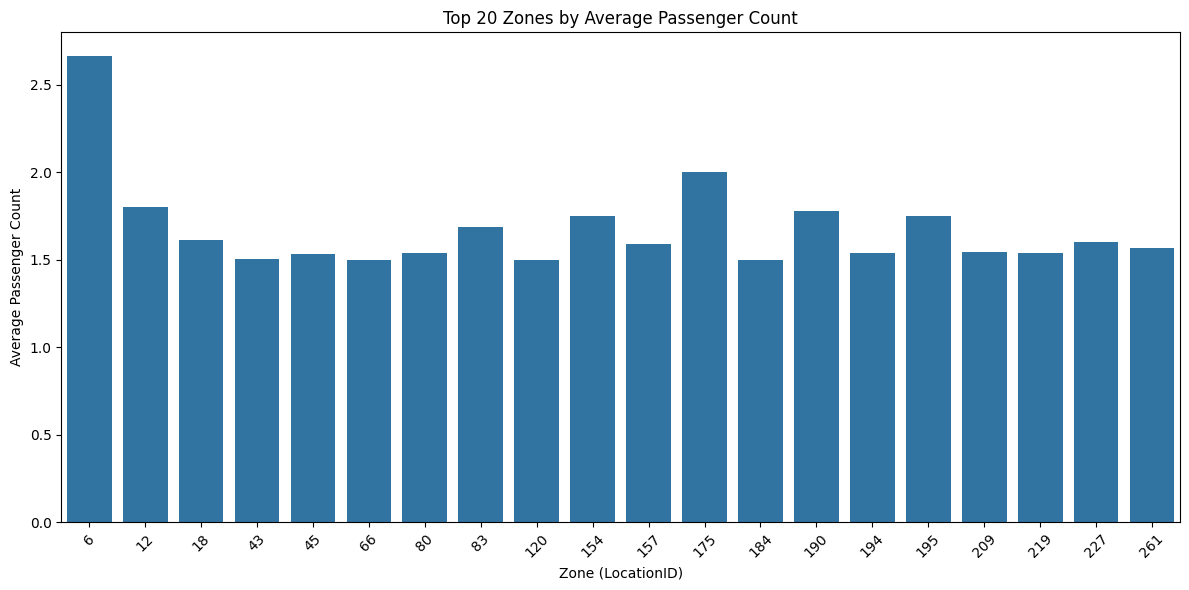

In [323]:
#How does passenger count vary across zones

# Group by PULocationID and calculate the average passenger count for each zone
avg_passenger_count_by_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge the average passenger count with the zones GeoDataFrame
zones_with_passenger_count = zones.merge(avg_passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 (for zones with no trips)
zones_with_passenger_count['passenger_count'].fillna(0, inplace=True)

# Sort by passenger count for better visualization
zones_sorted = zones_with_passenger_count.sort_values(by='passenger_count', ascending=False)

top_zones = zones_with_passenger_count.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_zones, x='LocationID', y='passenger_count')
plt.title('Top 20 Zones by Average Passenger Count')
plt.xlabel('Zone (LocationID)')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_21560\339202045.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zones_with_trips['passenger_count'].fillna(0, inplace=True)


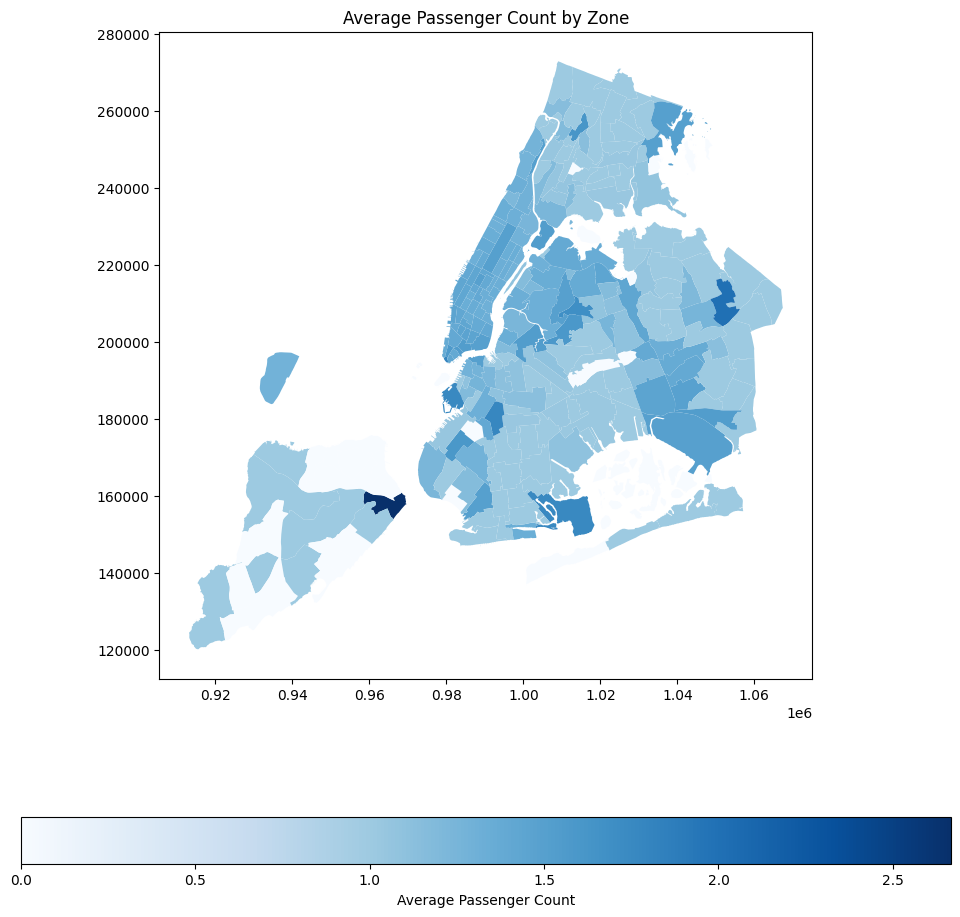

In [325]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Calculate the average passenger count for each zone
avg_passenger_count_by_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge the average passenger count with the zones_with_trips GeoDataFrame
zones_with_trips = zones_with_trips.merge(avg_passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 (for zones with no trips)
zones_with_trips['passenger_count'].fillna(0, inplace=True)

# Plot the average passenger count for each zone using a Geo Plot
zones_with_trips.plot(column='passenger_count', cmap='Blues', legend=True, legend_kwds={'label': "Average Passenger Count", 'orientation': "horizontal"}, figsize=(12, 12))
plt.title('Average Passenger Count by Zone')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [329]:
# How often is each surcharge applied?

# Calculate the frequency of each surcharge
surcharge_columns = ['extra', 'congestion_surcharge', 'airport_fee', 'improvement_surcharge']
surcharge_frequencies = merged_df[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()
surcharge_frequencies.columns = ['Surcharge', 'Frequency']

# Display the frequency of each surcharge
print("Frequency of each surcharge:")
print(surcharge_frequencies)


Frequency of each surcharge:
               Surcharge  Frequency
0                  extra     225533
1   congestion_surcharge     346105
2            airport_fee      31992
3  improvement_surcharge     371977


In [331]:
# Analyze the pickup zones where surcharges are applied more frequently
pickup_surcharge_zones = merged_df[merged_df[surcharge_columns].sum(axis=1) > 0].groupby('PULocationID').size().reset_index(name='surcharge_count')
pickup_surcharge_zones = pickup_surcharge_zones.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left').sort_values(by='surcharge_count', ascending=False)

# Display the top pickup zones with surcharges
print("Top pickup zones with surcharges:")
print(pickup_surcharge_zones.head(10))

Top pickup zones with surcharges:
     PULocationID  surcharge_count  LocationID                          zone
116           132            19153       132.0                   JFK Airport
214           237            17442       237.0         Upper East Side South
145           161            17180       161.0                Midtown Center
213           236            15732       236.0         Upper East Side North
146           162            13250       162.0                  Midtown East
168           186            12998       186.0  Penn Station/Madison Sq West
122           138            12876       138.0             LaGuardia Airport
126           142            12430       142.0           Lincoln Square East
207           230            12239       230.0     Times Sq/Theatre District
154           170            11112       170.0                   Murray Hill


In [355]:
# Analyze the times when surcharges are applied more frequently
merged_df['surcharge_applied_derived'] = merged_df[surcharge_columns].sum(axis=1) > 0
surcharge_by_hour = merged_df.groupby('pickup_hour')['surcharge_applied_derived'].sum().reset_index()
surcharge_by_hour


pickup_hour  surcharge_applied_derived
0             0                      10437
1             1                       6973
2             2                       4597
3             3                       3026
4             4                       2014
5             5                       2136
6             6                       5122
7             7                      10125
8             8                      14076
9             9                      15933
10           10                      17314
11           11                      18772
12           12                      20346
13           13                      21018
14           14                      22485
15           15                      23063
16           16                      23092
17           17                      25117
18           18                      26335
19           19                      23550
20           20                      20941
21           21                      20945
22           22                      19320
23           23                      15253

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
1. Dynamic Zone-Based Dispatching
Divide the city into dynamic service zones based on historical demand. Implement a heatmap-based dispatch algorithm to reroute idle taxis to high-demand areas in real-time.
Use pickup density data to pre-position taxis in anticipation of peak loads (e.g., near train stations at 6–8 PM or business hubs in the morning).

 2. Time-Aware Resource Allocation
Use hourly and daily demand patterns to:Increase driver availability during rush hours. Reduce active fleet during low-demand times (2–5 AM) to cut idle time and fuel costs.

Adjust routes and driver shifts accordingly.

 3. Day-Specific Strategies
Weekday strategy: focus more on commercial districts during office hours.
Weekend strategy: focus on entertainment, shopping, and nightlife zones, especially Friday/Saturday nights.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
1. Leverage Peak Hour & Zone Demand
Morning Peak (7 AM – 9 AM):
Concentrate cabs near residential zones with high outbound trips and major transit hubs where commuters start their rides.
Position cabs close to business districts where demand will spike shortly.

Evening Peak - Place more cabs in downtown and entertainment districtsto catch returning commuters and nightlife travelers.

Airports and transport hubs should have increased cab availability

2. Weekend and Holiday Positioning
On Fridays and Saturdays, shift some cabs toward bars, restaurants, entertainment zones, and shopping centers where leisure demand surges.
For public holidays and special events, pre-position cabs near event venues, stadiums, or tourist hotspots, anticipating spikes.

3. Monthly & Seasonal Adjustment:

Expect lower ridership in residential areas during bad weather; concentrate supply near airports and indoor venues.


4. Use Real-Time & Historical Data for Dynamic Reallocation
Create a demand heatmap per hour and zone updated daily to guide drivers where to position themselves. Use historical data patterns to predict under-served zones and dispatch incentives encouraging drivers to move proactively.

5. Zone Prioritization Based on Trip Revenue
Prioritize cab deployment in zones with higher average fare and tips to maximize driver earnings and satisfaction.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1. Implement Time-Based Dynamic Pricing (Surge Pricing)
Use hourly and daily demand patterns to apply higher fares during peak hours. Reduce fares slightly during off-peak hours. Use historical data to set dynamic price multipliers that reflect real demand spikes but cap them to avoid customer backlash.
Inform customers transparently about event pricing to maintain trust.
    
2. Incorporate Trip Distance & Duration More Effectively
Refine fare calculation formulas to better reflect trip duration and distance, especially accounting for traffic congestion during peak hours.For trips with short distance but high traffic time, slightly increase the time component of the fare to compensate drivers fairly.
Use the positive correlation between fare and distance/duration to avoid undercharging longer or slower trips.

3. Incentivize Digital Payments and Tipping
Offer a small fare discount or loyalty points for customers using digital or card payments, which have shown to increase tipping behavior.

4. Monitor Competitor Pricing
Continuously track competitor rates (ride-share apps, other taxi services) using market research and web scraping. Adjust your base and surge prices to remain competitive, especially during low demand periods. Use competitor pricing data to benchmark and fine-tune your pricing tiers.

